___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [117]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [193]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [194]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [195]:
# Checking the shape of one image
X_train[4].shape

(28, 28)

In [196]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,
          0,   0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230,
        147, 239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,
          0, 194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,
          0, 162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 232, 211, 215, 249,
         46, 162, 246, 214, 230, 186,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

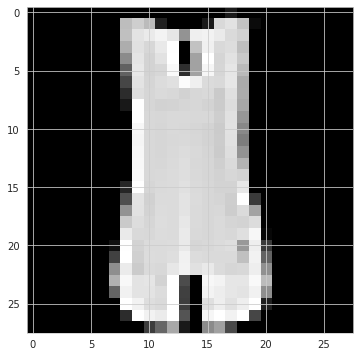

In [197]:
plt.imshow(X_train[4],cmap='gray')
# plt.matshow(X_train[4])

In [198]:
y_train[4]

0

In [199]:
y_train.shape

(60000,)

In [125]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [126]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [200]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [201]:
y_train[0]

9

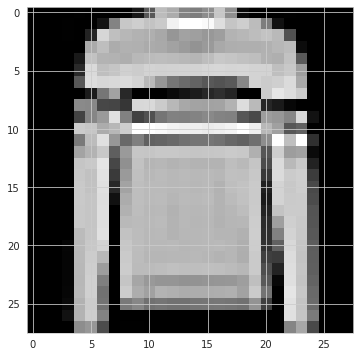

In [202]:
plt.imshow(X_train[5], cmap='gray')

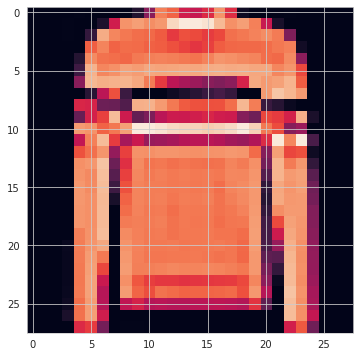

In [203]:
plt.imshow(X_train[5])

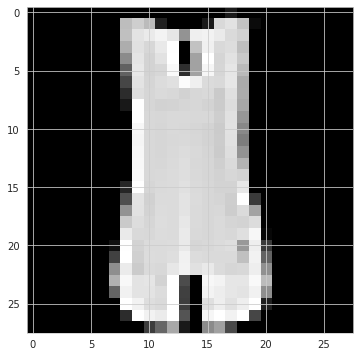

In [130]:
plt.imshow(X_train[4],cmap='gray')

In [131]:
classes[y_train[0]]

'Ankle boot'

In [132]:
classes[int(y_train[0])]

'Ankle boot'

In [133]:
y_train[0]

9

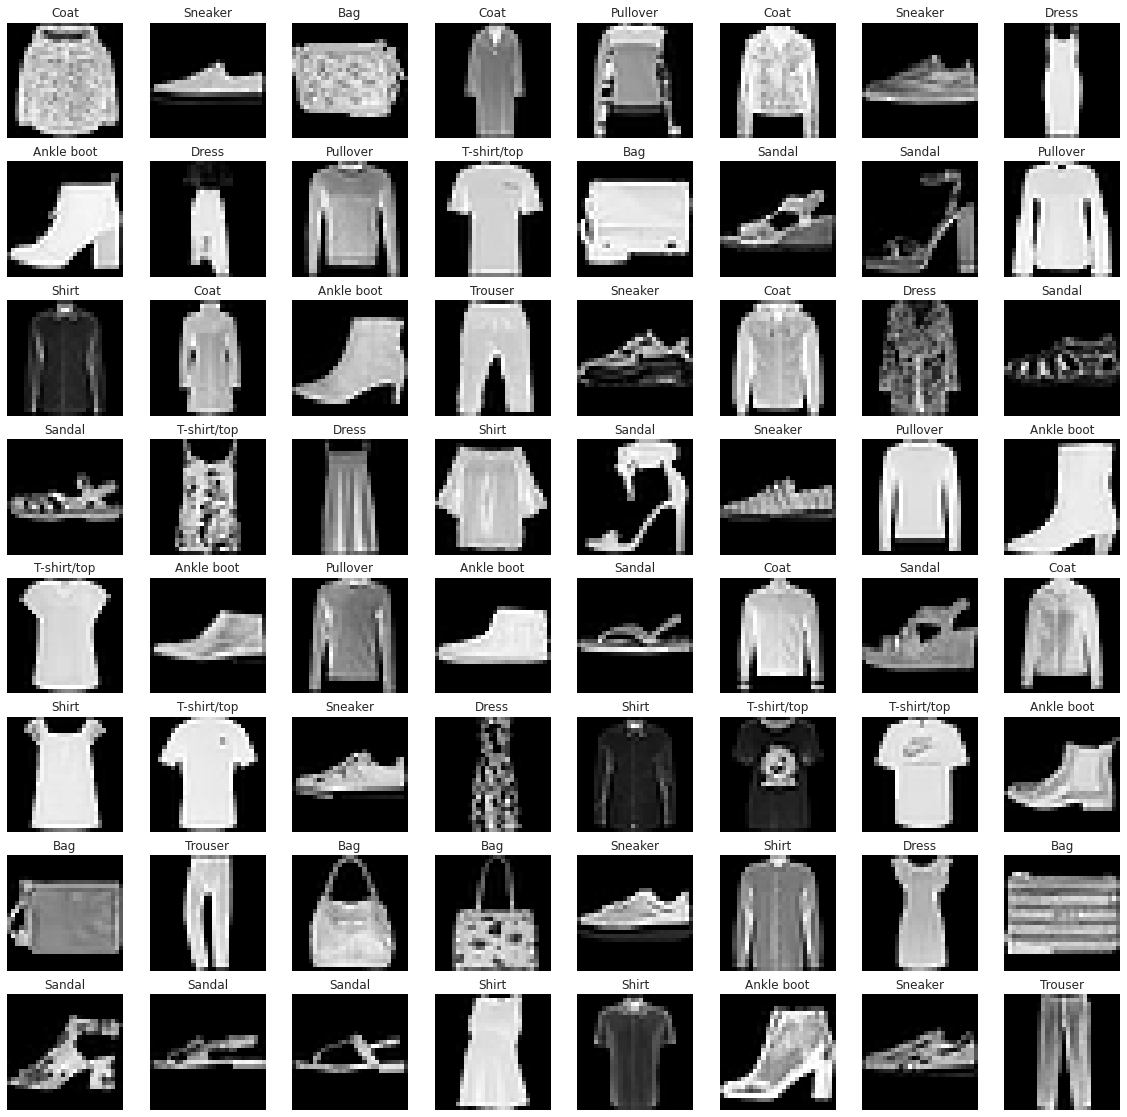

In [134]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index], cmap='gray')

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [135]:
X_train[5].min()

0

In [136]:
X_train[5].max()

255

In [137]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [138]:
X_train[5].min()

0.0

In [139]:
X_train[5].max()

1.0

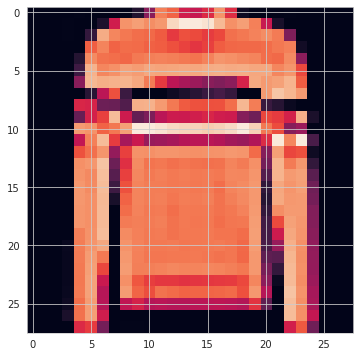

In [140]:
plt.imshow(X_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [141]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [142]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [143]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [144]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [145]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [146]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [147]:
from tensorflow.keras.utils import to_categorical

In [148]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [149]:
y_train[0]

9

In [150]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [152]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [153]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [154]:
from tensorflow.keras.callbacks import EarlyStopping

In [155]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [156]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3875 - accuracy: 0.8606 - val_loss: 0.3143 - val_accuracy: 0.8837
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2620 - accuracy: 0.9060 - val_loss: 0.2689 - val_accuracy: 0.9005
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2166 - accuracy: 0.9207 - val_loss: 0.2543 - val_accuracy: 0.9091
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1795 - accuracy: 0.9344 - val_loss: 0.2633 - val_accuracy: 0.9050
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1554 - accuracy: 0.9425 - val_loss: 0.2459 - val_accuracy: 0.9141
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1309 - accuracy: 0.9522 - val_loss: 0.2543 - val_accuracy: 0.9130
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1100 - accuracy: 0.9591 - val_loss: 0.2559 - val_accuracy:

In [157]:
X_train.shape

(60000, 28, 28, 1)

In [158]:
Y_train.shape

(60000, 10)

In [159]:
model.metrics_names

['loss', 'accuracy']

In [160]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.388,0.861,0.314,0.884
1,0.262,0.906,0.269,0.900
2,0.217,0.921,0.254,0.909
3,0.180,0.934,0.263,0.905
4,0.155,0.943,0.246,0.914


**TASK 7: Plot values of metrics you used in your model.**

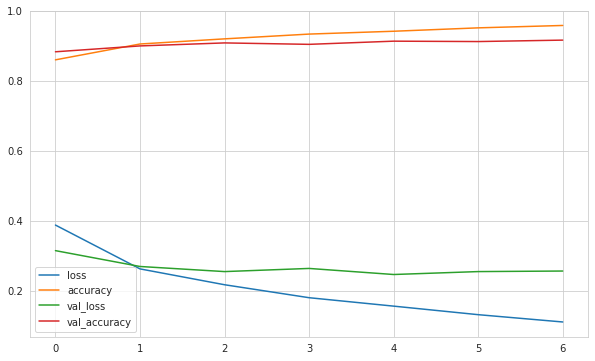

In [161]:
summary.plot();

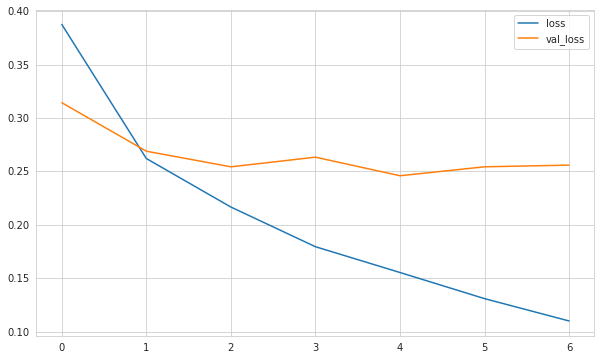

In [162]:
summary[["loss", "val_loss"]].plot();

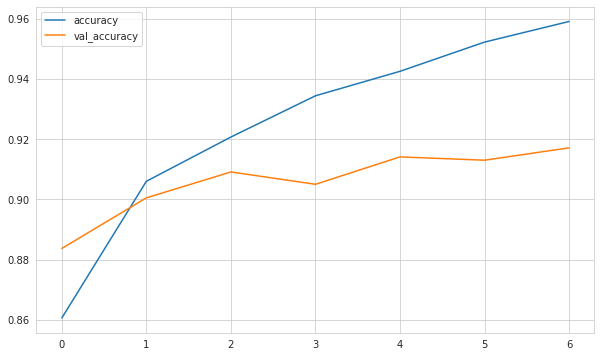

In [163]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [164]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [165]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2459 - accuracy: 0.9141


[0.245931938290596, 0.9140999913215637]

In [166]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.245931938290596
Test accuracy: 0.9140999913215637


In [167]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[3.49307834e-06, 3.13499471e-09, 1.17295670e-07, ...,
        1.83538022e-03, 1.17563886e-07, 9.98112202e-01],
       [1.25875422e-05, 1.18096166e-13, 9.99980569e-01, ...,
        3.28717420e-16, 8.21814784e-13, 2.66677888e-14],
       [1.48334580e-08, 1.00000000e+00, 5.94415517e-10, ...,
        3.36382906e-14, 1.46391121e-10, 1.73699325e-13],
       ...,
       [1.58009655e-07, 1.60745167e-11, 1.90495264e-08, ...,
        1.35915617e-08, 9.99927998e-01, 2.63150071e-08],
       [3.73746722e-08, 9.99999404e-01, 5.48878276e-08, ...,
        7.45158763e-13, 1.92966459e-11, 1.54136626e-09],
       [3.03832603e-05, 3.30025529e-07, 2.23863943e-04, ...,
        1.67444646e-02, 1.86241406e-03, 1.54946151e-03]], dtype=float32)

In [168]:
pred_prob.shape

(10000, 10)

In [169]:
pred_prob[0]

array([3.49307834e-06, 3.13499471e-09, 1.17295670e-07, 1.43002310e-09,
       3.13037617e-07, 4.82637515e-05, 1.45902504e-07, 1.83538022e-03,
       1.17563886e-07, 9.98112202e-01], dtype=float32)

In [170]:
np.argmax(pred_prob[0])

9

In [171]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [172]:
y_pred.shape

(10000,)

In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.88      0.87      1000
           3       0.93      0.91      0.92      1000
           4       0.85      0.87      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.79      0.72      0.75      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [174]:
print(confusion_matrix(y_test, y_pred))

[[898   0  11   7   3   1  72   0   7   1]
 [  3 979   2  10   4   0   0   0   2   0]
 [ 14   1 878   7  52   1  47   0   0   0]
 [ 19   5   9 908  29   0  29   0   1   0]
 [  3   0  65  18 874   0  40   0   0   0]
 [  0   0   0   0   0 988   0   5   0   7]
 [132   0  54  20  64   0 722   0   8   0]
 [  0   0   0   0   0  18   0 975   1   6]
 [  3   0   1   5   2   2   4   3 980   0]
 [  1   0   0   0   0   5   0  55   0 939]]


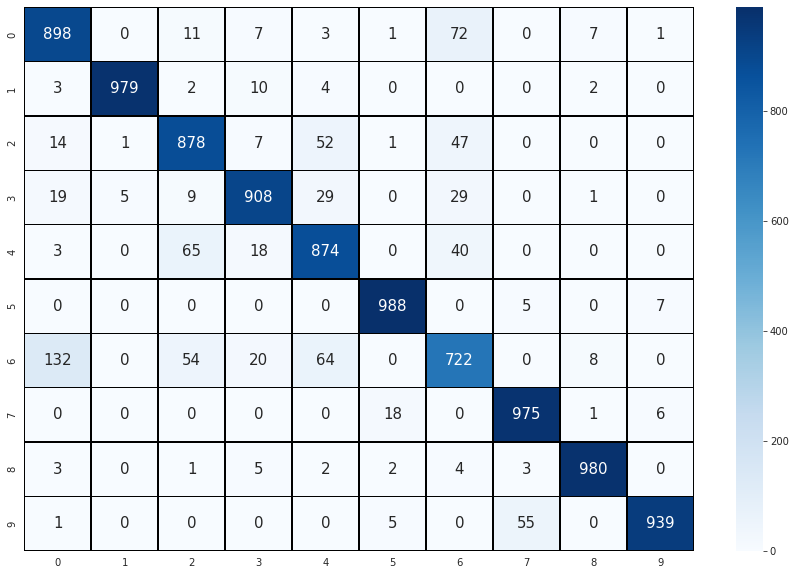

In [175]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [176]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [177]:
(y_test != y_pred).sum()

859

## Prediction

In [178]:
my_number = X_test[3]

In [179]:
my_number.shape

(28, 28, 1)

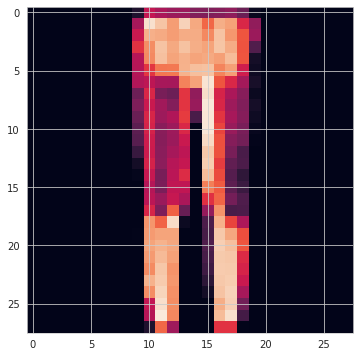

In [180]:
plt.imshow(my_number.reshape(28,28));

In [181]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 16ms/step


array([[7.1759874e-09, 9.9999988e-01, 5.6432397e-09, 9.3348497e-08,
        5.0542468e-09, 1.4761315e-12, 3.6584309e-09, 1.9499909e-13,
        2.0436363e-12, 2.8490012e-11]], dtype=float32)

In [182]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

1

In [183]:
model.save("cnn-2.h5")

# Using

In [184]:
model=tf.keras.models.load_model('cnn-2.h5')

In [185]:
pred=model.predict(np.expand_dims(X_test[24],axis=0))


1/1 [==============================] - 0s 47ms/step


In [186]:
np.argmax(pred)

1

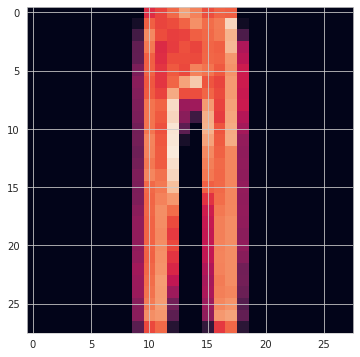

In [187]:
plt.imshow(X_test[24].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___